In [3]:
import torch
import random
import math
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import Args
import KMeansPP
import datetime
import MMDLoss
import Model
import Data
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
import numpy as np
import torch.optim as optim
import time
import os
import multiprocessing

from DataScientist import pca_deduce


In [548]:
math.pow(2,3)

8.0

In [39]:
import random


client_list = [i for i in range(100)]



list_weight_TD = []
list_weight = []

max_time = 0
client_weight = [1 for i in range(100)]
for i in range(1000):
    e_weights = [math.pow(math.e, i) for i in client_weight]
    sum = np.sum(e_weights)
    e_weights_1 = [i/sum for i in e_weights]
    # random_element = random.choices(client_list, weights=e_weights, k=10, replace=False,size=3)
    # random_element = random.choices(client_list, weights=client_weight, k=10)
    # random_element =  np.random.choice(a=client_list, size=10, replace=False, p=e_weights_1)
    random_element = random.choices(client_list, k=10)
    # print(random_element)
    for k in client_list:
        if k in random_element:
            client_weight[k] = 1
        else:
            client_weight[k] += 1

    new_max_time = max(client_weight)

    max_time = new_max_time if max_time < new_max_time else max_time

list_weight_TD.append(max_time)
    # list_weight.append(max_time)

print(list_weight_TD)

[102]


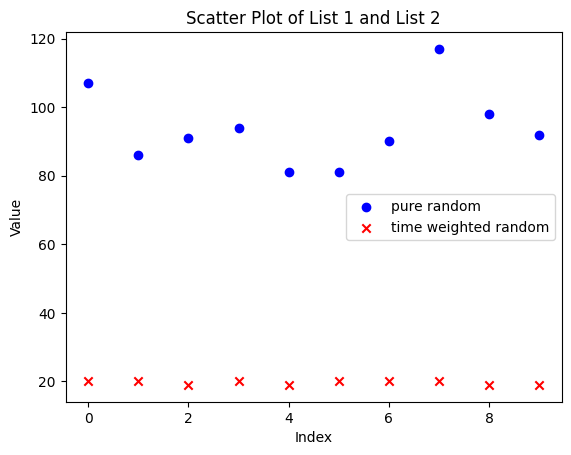

In [65]:
import matplotlib.pyplot as plt
list_weight = [107, 86, 91, 94, 81, 81, 90, 117, 98, 92]
list_weight_TD = [20, 20, 19, 20, 19, 20, 20, 20, 19, 19]

import matplotlib.pyplot as plt

# 两个示例列表，你需要替换成你自己的数据
list1 = [1, 2, 3, 4, 5]
list2 = [5, 4, 3, 2, 1]

# 创建一个散点图
plt.scatter(range(len(list_weight)), list_weight, label='pure random', color='blue', marker='o')
plt.scatter(range(len(list_weight_TD)), list_weight_TD, label='time weighted random', color='red', marker='x')

# 添加标签和标题
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Scatter Plot of List 1 and List 2')

# 显示图例
plt.legend()

# 显示图形
plt.show()


[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160]


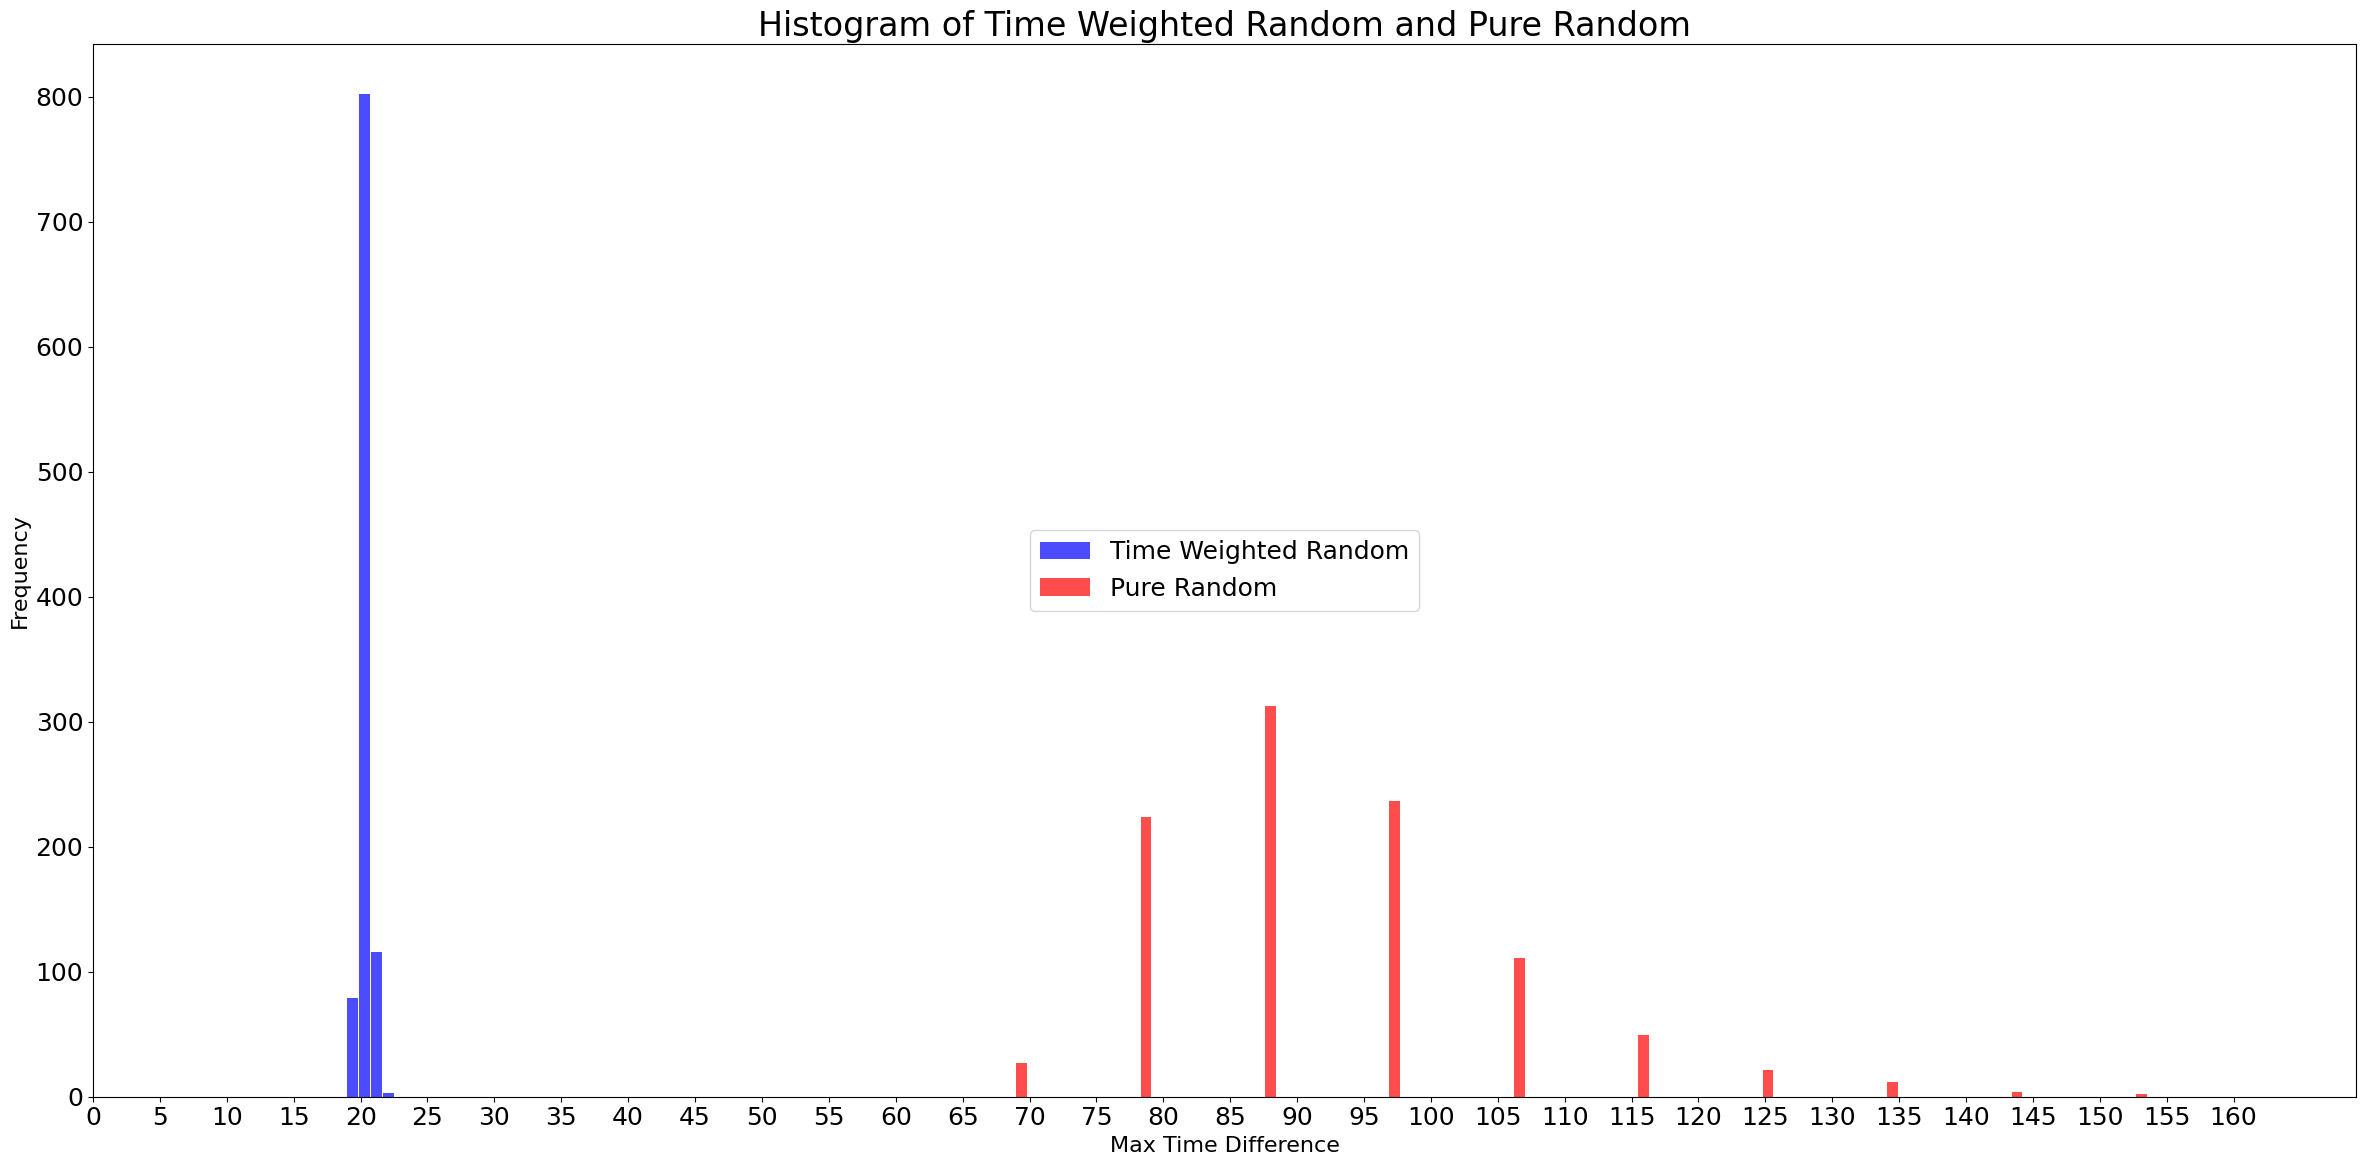

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns  # 导入Seaborn库，用于创建密度图

# client_list = [i for i in range(100)]
#
# list_weight_TD = []
# list_weight = []
# for i in range(1000):
#     max_time = 0
#     client_weight = [1 for i in range(100)]
#     for i in range(1000):
#         e_weights = [math.pow(math.e, i) for i in client_weight]
#         random_element = random.choices(client_list, weights=e_weights, k=10)
#         # random_element = random.choices(client_list, weights=client_weight, k=10)
#         # random_element = random.choices(client_list, k=10)
#
#         for k in client_list:
#             if k in random_element:
#                 client_weight[k] = 1
#             else:
#                 client_weight[k] += 1
#
#         new_max_time = max(client_weight)
#
#         max_time = new_max_time if max_time < new_max_time else max_time
#
#     list_weight_TD.append(max_time)
#
# for i in range(1000):
#     max_time = 0
#     client_weight = [1 for i in range(100)]
#     for i in range(1000):
#         e_weights = [math.pow(math.e, i) for i in client_weight]
#         # random_element = random.choices(client_list, weights=e_weights, k=20)
#         # random_element = random.choices(client_list, weights=client_weight, k=10)
#         random_element = random.choices(client_list, k=10)
#
#         for k in client_list:
#             if k in random_element:
#                 client_weight[k] = 1
#             else:
#                 client_weight[k] += 1
#
#         new_max_time = max(client_weight)
#
#         max_time = new_max_time if max_time < new_max_time else max_time
#
#     # list_weight_TD.append(max_time)
#     list_weight.append(max_time)
#
# np.save("list_weight_TD.npy", list_weight_TD)
# np.save("list_weight.npy", list_weight)

list_weight_TD = np.load("list_weight_TD.npy")
list_weight = np.load("list_weight.npy")
# 创建一个直方图
plt.figure(figsize=(24, 12))  # 设置图形大小
plt.subplot(1, 1, 1)  # 创建第一个子图

plt.hist(list_weight_TD, bins=10, color='blue', alpha=0.7, label='Time Weighted Random', width= 0.8)
plt.hist(list_weight, bins=10, color='red', alpha=0.7, label='Pure Random', width= 0.8)

plt.xlabel('Max Time Difference', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Histogram of Time Weighted Random and Pure Random',fontsize=24)

plt.rcParams.update({'font.size': 18})
x_ticks = [i for i in range(0, (int(max(list_weight)/10))*10+1,5)]  # 自定义刻度值
print(x_ticks)
plt.xticks(x_ticks)
plt.legend(loc='center', prop={'size': 18})  # 设置图例位置为右上角

# 显示图形
plt.tight_layout()
plt.show()


In [91]:
x_ticks = [i for i in range(0, (int(185/10)+1)*10+1,5)]
print(x_ticks)

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190]


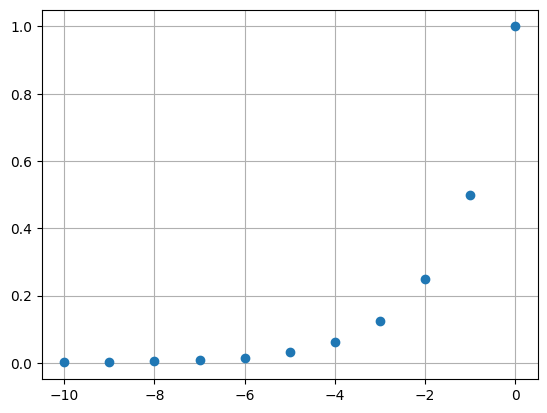

In [9]:


# 生成指数幂数据
exponents = range(-10, 1)

powers_of_2 = [pow(2, exp) for exp in exponents]

# 创建一个点图
plt.plot(exponents, powers_of_2, marker='o', linestyle='')

# 添加标签和标题

# 显示点图
plt.grid(True)
plt.show()


In [5]:
args = Args.Arguments()
train_workers_dataset = Data.load_data(args)
train_workers_dataset[0]
# len(train_workers_dataset[0]['data'])

{'data': tensor([[[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           ...,
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],
 
 
         [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           ...,
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],
 
 
         [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],